In [2]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import arabicABC as abc
from fuzzywuzzy import fuzz

/usr/local/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
lakhnawi = pd.read_csv('0Lakhnawi.csv', dtype={"page":int, "line":int, "column":int, "span":int, "direction": str, 
                                        "left":"Int64", "top":"Int64", "right":"Int64", "bottom":"Int64", 
                                        "word":str, "short":str, "haspunct":str, "punctAfter":str, "punctBefore":str, 
                                        "QunawiMS":str, "poetryMeter":str, "poetryVerse":"Int64", "fass":"Int64", "lwcvl":str, 
                                        "quran":str})
lakhnawi.word = lakhnawi.word.fillna('')
lakhnawi.short = lakhnawi.short.fillna('')
lakhnawi.haspunct = lakhnawi.haspunct.fillna('')
lakhnawi.punctAfter = lakhnawi.punctAfter.fillna('')
lakhnawi.punctBefore = lakhnawi.punctBefore.fillna('')
lakhnawi.poetryMeter = lakhnawi.poetryMeter.fillna('')
lakhnawi.lwcvl = lakhnawi.lwcvl.fillna('')
lakhnawi.quran = lakhnawi.quran.fillna('')

In [4]:
afifi = pd.read_csv('0Afifi.csv')

In [5]:
afifi = afifi.drop([114])
afifi = afifi.reset_index(drop=True)

In [6]:
textAfifi = afifi["letters"][2:].tolist()
textLakhnawi = lakhnawi["short"].tolist()
textAfifi = [x for x in textAfifi if str(x) != 'nan']

In [7]:
for i in range(len(textAfifi)):
    textAfifi[i] = abc.normalize(textAfifi[i])

In [9]:
textAfifi[250]

'بالشرع'

In [12]:
# x0 = 0
# x1 = 0
# comparativeIndex = [None,None,None]*500
# # comparativeIndex = {}
# fuzzResults = [None]*500

# i = 0
# while x0 < len(textAfifi) and x1 < len(textLakhnawi):
# # for i in range(250):
#     if textAfifi[x0] == textLakhnawi[x1]:
#         comparativeIndex[i] = [x0, x1]
#         x0 += 1
#         x1 += 1
#     else:
#         anteLocus = (abc.rasm(textAfifi[x0-1]), abc.rasm(textLakhnawi[x1-1]))
#         sicLocus = (abc.rasm(textAfifi[x0]), abc.rasm(textLakhnawi[x1]))
#         postLocus = (abc.rasm(textAfifi[x0+1]), abc.rasm(textLakhnawi[x1+1]))
# #         Afi = abc.rasm(textAfifi[x0])
# #         Lak = abc.rasm(textLakhnawi[x1])
#         antefuzz = fuzz.ratio(anteLocus[0],anteLocus[1])
#         sicfuzz = fuzz.ratio(sicLocus[0],sicLocus[1])
#         postfuzz = fuzz.ratio(postLocus[0],postLocus[1])
#         sicApostBfuzz = fuzz.ratio(sicLocus[0],postLocus[1])
#         postAsicBfuzz = fuzz.ratio(postLocus[0],sicLocus[1])
        
#         if sicfuzz >= 80:
# # sicfuzz == max(antefuzz,sicfuzz,postfuzz,sicApostBfuzz,postAsicBfuzz)
#             comparativeIndex[i] = [x0, x1]
#             fuzzResults[i] = ['sameish','SICFUZZ '+str(sicfuzz),'Antefuzz '+str(antefuzz),'Postfuzz '+str(postfuzz),'sicApostB '+str(sicApostBfuzz),'PostAsicB '+str(postAsicBfuzz)]
#             x0 += 1
#             x1 += 1
#         elif antefuzz > 80 and postfuzz > 80:
# # antefuzz > max(sicfuzz,sicApostBfuzz,postAsicBfuzz) and postfuzz > max(sicfuzz,sicApostBfuzz,postAsicBfuzz)
#             comparativeIndex[i] = [x0, x1]
#             fuzzResults[i] = ['different word','Sicfuzz '+str(sicfuzz),'ANTEFUZZ '+str(antefuzz),'POSTFUZZ '+str(postfuzz),'sicApostB '+str(sicApostBfuzz),'PostAsicB '+str(postAsicBfuzz)]
#             x0 += 1
#             x1 += 1
#         elif sicApostBfuzz > postAsicBfuzz:
# # sicApostBfuzz >= max(sicfuzz,antefuzz,postfuzz,postAsicBfuzz)
#             comparativeIndex[i] = [None, x1]
#             fuzzResults[i] = ['B unique','Sicfuzz '+str(sicfuzz),'Antefuzz '+str(antefuzz),'Postfuzz '+str(postfuzz),'SICAPOSTB '+str(sicApostBfuzz),'PostAsicB '+str(postAsicBfuzz)]
#             x1+=1
#         elif postAsicBfuzz > sicApostBfuzz:
# # postAsicBfuzz >= max(sicfuzz,antefuzz,postfuzz,sicApostBfuzz)
#             comparativeIndex[i] = [x0, None]
#             fuzzResults[i] = ['A unique','Sicfuzz '+str(sicfuzz),'Antefuzz '+str(antefuzz),'Postfuzz '+str(postfuzz),'sicApostB '+str(sicApostBfuzz),'POSTASICB '+str(postAsicBfuzz)]
#             x0+=1
#         elif postAsicBfuzz == sicApostBfuzz:
#             fuzzswap = fuzz.ratio(abc.rasm(textAfifi[x0+2]),abc.rasm(textLakhnawi[x1+2]))
#             if antefuzz > 80 and fuzzswap > 80:
#                 comparativeIndex[i] = [x0, x1]
#                 fuzzResults[i] = ['wordswap','sicfuzz '+str(sicfuzz),'antefuzz '+str(antefuzz),'postfuzz '+str(postfuzz),'sicApostB '+str(sicApostBfuzz),'PostAsicB '+str(postAsicBfuzz)]
#                 x0 += 1
#                 x1 += 1
#             else:
#                 comparativeIndex[i] = [x0, None]
#                 x0+=1
#                 fuzzResults[i] = ['unsure of wordswap, making A unique','Sicfuzz '+str(sicfuzz),'Antefuzz '+str(antefuzz),'Postfuzz '+str(postfuzz),'sicApostB '+str(sicApostBfuzz),'PostAsicB '+str(postAsicBfuzz)]
#         else:
#             comparativeIndex[i] = [None, None]
#             fuzzResults[i] = ['unsure','Sicfuzz '+str(sicfuzz),'Antefuzz '+str(antefuzz),'Postfuzz '+str(postfuzz),'sicApostB '+str(sicApostBfuzz),'PostAsicB '+str(postAsicBfuzz)]
            
# #         if fuzz.ratio(Afi, Lak) > 65:
# #             comparativeIndex[i] = [x0, x1]
# #             x0 += 1
# #             x1 += 1
# #         elif (fuzz.ratio(abc.rasm(textAfifi[x0-1]),abc.rasm(textLakhnawi[x1-1])) > 65 ) and (fuzz.ratio(abc.rasm(textAfifi[x0+1]),abc.rasm(textLakhnawi[x1+1])) > 65):
# #             comparativeIndex[i] = [x0, x1]
# #             x0 += 1
# #             x1 += 1
# #         elif fuzz.ratio(abc.rasm(textAfifi[x0]), abc.rasm(textLakhnawi[x1+1])) > 65:
# #             comparativeIndex[i] = [None, x1]
# #             x1+=1
# #         elif fuzz.ratio(abc.rasm(textLakhnawi[x1]), abc.rasm(textAfifi[x0+1])) > 65:
# #             comparativeIndex[i] = [x0, None]
# #             x0+=1
# #         else:
# #             comparativeIndex[i] = [None, None]
#     i+=1

# y=0
# for i in comparativeIndex:
#     if i[0] == None:
#         Afifi = "***"
#     else:
#         Afifi = textAfifi[i[0]]
#     if i[1] == None:
#         Lakhnawi = "***"
#     else:
#         Lakhnawi = textLakhnawi[i[1]]
#     print('INDEX',i)
#     print('AFIFI',Afifi)
#     print('LAKHNAWI',Lakhnawi)
#     print(fuzzResults[y])
#     y+=1
#     print(" ")

276


TypeError: 'int' object is not subscriptable

In [108]:
textLakhnawi[215:220]

['فإذا', 'سمعتم', 'ما', 'أتيتم', 'به']

In [109]:
textAfifi[216:221]

['فإذا', 'ما', 'سمعتم', 'ما', 'أتيت']

In [53]:
textLakhnawi[177:181]

['الحق', 'تعالى', 'لما', 'سمع']

In [124]:
fuzz.ratio(abc.rasm(textAfifi[217]),abc.rasm(textLakhnawi[216]))

33

In [76]:
abc.rasm(textAfifi[205])

'رسول'

In [77]:
abc.rasm(textLakhnawi[203])

'ول'

In [92]:
max(2,0,2.4)

2.4

In [ ]:
fuzz.ratio(abc.rasm(textAfifi[x0+2]),abc.rasm(textLakhnawi[x1+2]))

# Here follows the merger-algorithm

In [20]:
nameA = "Afifi"
nameB = "Lakhnawi"
textA = textAfifi
textB = textLakhnawi
x0 = 0
x1 = 0
i = 0
comparativeIndex = {}
fuzzResults = {}

while x0 < len(textA) and x1 < len(textB):
    if textA[x0] == textB[x1]:
        comparativeIndex[i] = [x0, x1]
        x0 += 1
        x1 += 1
    else:
        anteLocus = (abc.rasm(textA[x0-1]), abc.rasm(textB[x1-1]))
        sicLocus = (abc.rasm(textA[x0]), abc.rasm(textB[x1]))
        postLocus = (abc.rasm(textA[x0+1]), abc.rasm(textB[x1+1]))
        antefuzz = fuzz.ratio(anteLocus[0],anteLocus[1])
        sicfuzz = fuzz.ratio(sicLocus[0],sicLocus[1])
        postfuzz = fuzz.ratio(postLocus[0],postLocus[1])
        sicApostBfuzz = fuzz.ratio(sicLocus[0],postLocus[1])
        postAsicBfuzz = fuzz.ratio(postLocus[0],sicLocus[1])
        
        if sicfuzz >= 80:
# sicfuzz == max(antefuzz,sicfuzz,postfuzz,sicApostBfuzz,postAsicBfuzz)
            comparativeIndex[i] = [x0, x1]
            fuzzResults[i] = ['sameish','SICFUZZ '+str(sicfuzz),'Antefuzz '+str(antefuzz),'Postfuzz '+str(postfuzz),'sicApostB '+str(sicApostBfuzz),'PostAsicB '+str(postAsicBfuzz)]
            x0 += 1
            x1 += 1
        elif antefuzz > 80 and postfuzz > 80:
# antefuzz > max(sicfuzz,sicApostBfuzz,postAsicBfuzz) and postfuzz > max(sicfuzz,sicApostBfuzz,postAsicBfuzz)
            comparativeIndex[i] = [x0, x1]
            fuzzResults[i] = ['different word','Sicfuzz '+str(sicfuzz),'ANTEFUZZ '+str(antefuzz),'POSTFUZZ '+str(postfuzz),'sicApostB '+str(sicApostBfuzz),'PostAsicB '+str(postAsicBfuzz)]
            x0 += 1
            x1 += 1
        elif sicApostBfuzz > postAsicBfuzz:
# sicApostBfuzz >= max(sicfuzz,antefuzz,postfuzz,postAsicBfuzz)
            comparativeIndex[i] = [None, x1]
            fuzzResults[i] = ['B unique','Sicfuzz '+str(sicfuzz),'Antefuzz '+str(antefuzz),'Postfuzz '+str(postfuzz),'SICAPOSTB '+str(sicApostBfuzz),'PostAsicB '+str(postAsicBfuzz)]
            x1+=1
        elif postAsicBfuzz > sicApostBfuzz:
# postAsicBfuzz >= max(sicfuzz,antefuzz,postfuzz,sicApostBfuzz)
            comparativeIndex[i] = [x0, None]
            fuzzResults[i] = ['A unique','Sicfuzz '+str(sicfuzz),'Antefuzz '+str(antefuzz),'Postfuzz '+str(postfuzz),'sicApostB '+str(sicApostBfuzz),'POSTASICB '+str(postAsicBfuzz)]
            x0+=1
        elif postAsicBfuzz == sicApostBfuzz:
            fuzzswap = fuzz.ratio(abc.rasm(textA[x0+2]),abc.rasm(textB[x1+2]))
            if antefuzz > 80 and fuzzswap > 80:
                comparativeIndex[i] = [x0, x1]
                fuzzResults[i] = ['wordswap','sicfuzz '+str(sicfuzz),'antefuzz '+str(antefuzz),'postfuzz '+str(postfuzz),'sicApostB '+str(sicApostBfuzz),'PostAsicB '+str(postAsicBfuzz)]
                x0 += 1
                x1 += 1
            else:
                comparativeIndex[i] = [x0, None]
                x0+=1
                fuzzResults[i] = ['unsure of wordswap, making A unique','Sicfuzz '+str(sicfuzz),'Antefuzz '+str(antefuzz),'Postfuzz '+str(postfuzz),'sicApostB '+str(sicApostBfuzz),'PostAsicB '+str(postAsicBfuzz)]
        else:
            comparativeIndex[i] = [None, None]
            fuzzResults[i] = ['unsure','Sicfuzz '+str(sicfuzz),'Antefuzz '+str(antefuzz),'Postfuzz '+str(postfuzz),'sicApostB '+str(sicApostBfuzz),'PostAsicB '+str(postAsicBfuzz)]
    i+=1

y=0
for i in range(len(comparativeIndex)):
    if comparativeIndex[i][0] == None:
        A = "***"
    else:
        A = textA[comparativeIndex[i][0]]
    if comparativeIndex[i][1] == None:
        B = "***"
    else:
        B = textB[comparativeIndex[i][1]]
    print('INDEX',comparativeIndex[i])
    print(nameA,A)
    print(nameB,B)
    if y in fuzzResults:
        print(fuzzResults[y])
    y+=1
    print(" ")

INDEX [0, 0]
Afifi الحمد
Lakhnawi الحمد
 
INDEX [1, 1]
Afifi له
Lakhnawi لله
['sameish', 'SICFUZZ 80', 'Antefuzz 100', 'Postfuzz 100', 'sicApostB 33', 'PostAsicB 29']
 
INDEX [2, 2]
Afifi منزل
Lakhnawi منزل
 
INDEX [3, 3]
Afifi الحك
Lakhnawi الحكم
['sameish', 'SICFUZZ 86', 'Antefuzz 100', 'Postfuzz 100', 'sicApostB 40', 'PostAsicB 33']
 
INDEX [4, 4]
Afifi على
Lakhnawi على
 
INDEX [5, 5]
Afifi قلوب
Lakhnawi قلوب
 
INDEX [6, 6]
Afifi الكلم
Lakhnawi الكلم
 
INDEX [7, 7]
Afifi بأحدية
Lakhnawi بأحدية
 
INDEX [8, 8]
Afifi الطريق
Lakhnawi الطريق
 
INDEX [9, 9]
Afifi الأمم
Lakhnawi الأمم
 
INDEX [10, 10]
Afifi من
Lakhnawi من
 
INDEX [11, 11]
Afifi المقام
Lakhnawi المقام
 
INDEX [12, None]
Afifi ا
Lakhnawi ***
['A unique', 'Sicfuzz 0', 'Antefuzz 100', 'Postfuzz 0', 'sicApostB 0', 'POSTASICB 100']
 
INDEX [13, 12]
Afifi الأقدم
Lakhnawi الأقدم
 
INDEX [14, 13]
Afifi وإن
Lakhnawi وإن
 
INDEX [15, 14]
Afifi اختلفت
Lakhnawi اختلفت
 
INDEX [16, 15]
Afifi النحل
Lakhnawi النحل
 
INDEX [17, 16]
Afifi و

Twee reeksen maken voor `A` en `B`: 0: not there, 1: same, 2: sameish, 3: different but same position, 4: unique
Dan plotten: 0 Niet 1 DonkerGroen 2 LichtGroen 3 Oranje 4 Rood

In [27]:
for i in range(len(comparativeIndex)):
    if comparativeIndex[i][1] == None:
        print('oh no')

oh no
oh no
oh no
oh no
oh no
oh no
oh no


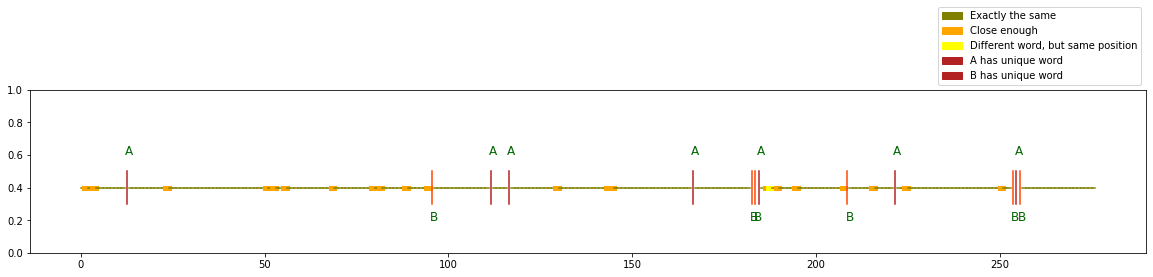

In [92]:
plt.figure(figsize=(20,3))
plt.autoscale(enable=False, axis='y')
xValues = []
yValues = []

olive_patch = mpatches.Patch(color='olive', label='Exactly the same')
orange_patch = mpatches.Patch(color='orange', label='Close enough')
yellow_patch = mpatches.Patch(color='yellow', label='Different word, but same position')
firebrick_patch = mpatches.Patch(color='firebrick', label='A has unique word')
orangered_patch = mpatches.Patch(color='firebrick', label='B has unique word')

plt.legend(handles=[olive_patch, orange_patch, yellow_patch, firebrick_patch,orangered_patch],bbox_to_anchor=(1, 1),loc='lower right')

for i in range(len(comparativeIndex)):
    if i in fuzzResults:
        if fuzzResults[i][0] == 'sameish':
            plt.plot([i,i+1],[0.4,0.4], color='Orange',linewidth=5)
        elif fuzzResults[i][0] == 'A unique' or fuzzResults[i][0] == 'unsure of wordswap, making A unique':
            plt.plot([(i+i+1)/2,(i+i+1)/2],[0.3,0.5], color='firebrick')
            plt.text(i, 0.6, "A", fontsize=12, color='Darkgreen')
        elif fuzzResults[i][0] == 'B unique':
            plt.plot([(i+i+1)/2,(i+i+1)/2],[0.3,0.5], color='orangered')
            plt.text(i, 0.2, "B", fontsize=12, color='Darkgreen')
        elif fuzzResults[i][0] == 'different word':
            plt.plot([i,i+1],[0.4,0.4], color='Yellow', linewidth=5)
    else:
        plt.plot([i,i+1],[0.4,0.4], color='olive')

In [52]:
for i in range(len(comparativeIndex)):
    if i in fuzzResults:
        print(fuzzResults[i][0])

sameish
sameish
A unique
sameish
sameish
sameish
sameish
sameish
sameish
sameish
sameish
sameish
B unique
A unique
A unique
sameish
sameish
sameish
A unique
B unique
B unique
A unique
sameish
different word
sameish
sameish
sameish
B unique
sameish
unsure of wordswap, making A unique
sameish
sameish
B unique
unsure of wordswap, making A unique
B unique


# Een probeerseltje

In [2]:
afifi = pd.read_csv('AfifiCleaned.csv')

In [3]:
textAfifi = afifi['letters'][2:].tolist()

In [4]:
lakhnawi = pd.read_csv('fusus.csv', dtype={"page":int, "line":int, "column":int, "span":int, "direction": str, 
                                        "left":"Int64", "top":"Int64", "right":"Int64", "bottom":"Int64", 
                                        "word":str, "short":str, "haspunct":str, "punctAfter":str, "punctBefore":str, 
                                        "QunawiMS":str, "poetryMeter":str, "poetryVerse":"Int64", "fass":"Int64", "lwcvl":str, 
                                        "quran":str})
lakhnawi.word = lakhnawi.word.fillna('')
lakhnawi.short = lakhnawi.short.fillna('')
lakhnawi.haspunct = lakhnawi.haspunct.fillna('')
lakhnawi.punctAfter = lakhnawi.punctAfter.fillna('')
lakhnawi.punctBefore = lakhnawi.punctBefore.fillna('')
lakhnawi.poetryMeter = lakhnawi.poetryMeter.fillna('')
lakhnawi.lwcvl = lakhnawi.lwcvl.fillna('')
lakhnawi.quran = lakhnawi.quran.fillna('')

In [5]:
textLakhnawi = lakhnawi['short']

In [6]:
nameA = "Afifi"
nameB = "Lakhnawi"
textA = textAfifi
textB = textLakhnawi
x0 = 0
x1 = 0
i = 0
comparativeIndex = {}
fuzzResults = {}

# while x0 < len(textA) and x1 < len(textB):
while x0 < 700:
    if textA[x0] == textB[x1]:
        comparativeIndex[i] = [x0, x1]
        x0 += 1
        x1 += 1
    else:
        anteLocus = (abc.rasm(textA[x0-1]), abc.rasm(textB[x1-1]))
        sicLocus = (abc.rasm(textA[x0]), abc.rasm(textB[x1]))
        postLocus = (abc.rasm(textA[x0+1]), abc.rasm(textB[x1+1]))
        antefuzz = fuzz.ratio(anteLocus[0],anteLocus[1])
        sicfuzz = fuzz.ratio(sicLocus[0],sicLocus[1])
        postfuzz = fuzz.ratio(postLocus[0],postLocus[1])
        sicApostBfuzz = fuzz.ratio(sicLocus[0],postLocus[1])
        postAsicBfuzz = fuzz.ratio(postLocus[0],sicLocus[1])
        
        if sicfuzz >= 80:
# sicfuzz == max(antefuzz,sicfuzz,postfuzz,sicApostBfuzz,postAsicBfuzz)
            comparativeIndex[i] = [x0, x1]
            fuzzResults[i] = ['sameish','SICFUZZ '+str(sicfuzz),'Antefuzz '+str(antefuzz),'Postfuzz '+str(postfuzz),'sicApostB '+str(sicApostBfuzz),'PostAsicB '+str(postAsicBfuzz)]
            x0 += 1
            x1 += 1
        elif antefuzz > 80 and postfuzz > 80:
# antefuzz > max(sicfuzz,sicApostBfuzz,postAsicBfuzz) and postfuzz > max(sicfuzz,sicApostBfuzz,postAsicBfuzz)
            comparativeIndex[i] = [x0, x1]
            fuzzResults[i] = ['different word','Sicfuzz '+str(sicfuzz),'ANTEFUZZ '+str(antefuzz),'POSTFUZZ '+str(postfuzz),'sicApostB '+str(sicApostBfuzz),'PostAsicB '+str(postAsicBfuzz)]
            x0 += 1
            x1 += 1
        elif sicApostBfuzz > postAsicBfuzz:
# sicApostBfuzz >= max(sicfuzz,antefuzz,postfuzz,postAsicBfuzz)
            comparativeIndex[i] = [None, x1]
            fuzzResults[i] = ['B unique','Sicfuzz '+str(sicfuzz),'Antefuzz '+str(antefuzz),'Postfuzz '+str(postfuzz),'SICAPOSTB '+str(sicApostBfuzz),'PostAsicB '+str(postAsicBfuzz)]
            x1+=1
        elif postAsicBfuzz > sicApostBfuzz:
# postAsicBfuzz >= max(sicfuzz,antefuzz,postfuzz,sicApostBfuzz)
            comparativeIndex[i] = [x0, None]
            fuzzResults[i] = ['A unique','Sicfuzz '+str(sicfuzz),'Antefuzz '+str(antefuzz),'Postfuzz '+str(postfuzz),'sicApostB '+str(sicApostBfuzz),'POSTASICB '+str(postAsicBfuzz)]
            x0+=1
        elif postAsicBfuzz == sicApostBfuzz:
            fuzzswap = fuzz.ratio(abc.rasm(textA[x0+2]),abc.rasm(textB[x1+2]))
            if antefuzz > 80 and fuzzswap > 80:
                comparativeIndex[i] = [x0, x1]
                fuzzResults[i] = ['wordswap','sicfuzz '+str(sicfuzz),'antefuzz '+str(antefuzz),'postfuzz '+str(postfuzz),'sicApostB '+str(sicApostBfuzz),'PostAsicB '+str(postAsicBfuzz)]
                x0 += 1
                x1 += 1
            else:
                comparativeIndex[i] = [x0, None]
                x0+=1
                fuzzResults[i] = ['unsure of wordswap, making A unique','Sicfuzz '+str(sicfuzz),'Antefuzz '+str(antefuzz),'Postfuzz '+str(postfuzz),'sicApostB '+str(sicApostBfuzz),'PostAsicB '+str(postAsicBfuzz)]
        else:
            comparativeIndex[i] = [None, None]
            fuzzResults[i] = ['unsure','Sicfuzz '+str(sicfuzz),'Antefuzz '+str(antefuzz),'Postfuzz '+str(postfuzz),'sicApostB '+str(sicApostBfuzz),'PostAsicB '+str(postAsicBfuzz)]
    i+=1

y=0
for i in range(len(comparativeIndex)):
    if comparativeIndex[i][0] == None:
        A = "***"
    else:
        A = textA[comparativeIndex[i][0]]
    if comparativeIndex[i][1] == None:
        B = "***"
    else:
        B = textB[comparativeIndex[i][1]]
    print('INDEX',comparativeIndex[i])
    print(nameA,A)
    print(nameB,B)
    if y in fuzzResults:
        print(fuzzResults[y])
    y+=1
    print(" ")

INDEX [0, 0]
Afifi الحمد
Lakhnawi الحمد
 
INDEX [1, 1]
Afifi له
Lakhnawi لله
['sameish', 'SICFUZZ 80', 'Antefuzz 100', 'Postfuzz 100', 'sicApostB 33', 'PostAsicB 29']
 
INDEX [2, 2]
Afifi منزل
Lakhnawi منزل
 
INDEX [3, 3]
Afifi الحك
Lakhnawi الحكم
['sameish', 'SICFUZZ 86', 'Antefuzz 100', 'Postfuzz 100', 'sicApostB 40', 'PostAsicB 33']
 
INDEX [4, 4]
Afifi على
Lakhnawi على
 
INDEX [5, 5]
Afifi قلوب
Lakhnawi قلوب
 
INDEX [6, 6]
Afifi الكلم
Lakhnawi الكلم
 
INDEX [7, 7]
Afifi بأحدية
Lakhnawi بأحدية
 
INDEX [8, 8]
Afifi الطريق
Lakhnawi الطريق
 
INDEX [9, 9]
Afifi الأمم
Lakhnawi الأمم
 
INDEX [10, 10]
Afifi من
Lakhnawi من
 
INDEX [11, 11]
Afifi المقام
Lakhnawi المقام
 
INDEX [12, None]
Afifi ا
Lakhnawi ***
['A unique', 'Sicfuzz 0', 'Antefuzz 100', 'Postfuzz 0', 'sicApostB 0', 'POSTASICB 100']
 
INDEX [13, 12]
Afifi الأقدم
Lakhnawi الأقدم
 
INDEX [14, 13]
Afifi وإن
Lakhnawi وإن
 
INDEX [15, 14]
Afifi اختلفت
Lakhnawi اختلفت
 
INDEX [16, 15]
Afifi النحل
Lakhnawi النحل
 
INDEX [17, 16]
Afifi و

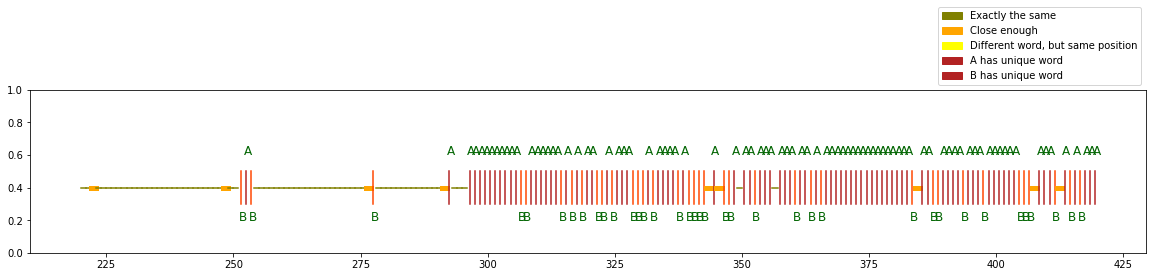

In [7]:
plt.figure(figsize=(20,3))
plt.autoscale(enable=False, axis='y')
xValues = []
yValues = []

olive_patch = mpatches.Patch(color='olive', label='Exactly the same')
orange_patch = mpatches.Patch(color='orange', label='Close enough')
yellow_patch = mpatches.Patch(color='yellow', label='Different word, but same position')
firebrick_patch = mpatches.Patch(color='firebrick', label='A has unique word')
orangered_patch = mpatches.Patch(color='firebrick', label='B has unique word')

plt.legend(handles=[olive_patch, orange_patch, yellow_patch, firebrick_patch,orangered_patch],bbox_to_anchor=(1, 1),loc='lower right')

# for i in range(len(comparativeIndex)):
for i in range(220,420):
    if i in fuzzResults:
        if fuzzResults[i][0] == 'sameish':
            plt.plot([i,i+1],[0.4,0.4], color='Orange',linewidth=5)
        elif fuzzResults[i][0] == 'A unique' or fuzzResults[i][0] == 'unsure of wordswap, making A unique':
            plt.plot([(i+i+1)/2,(i+i+1)/2],[0.3,0.5], color='firebrick')
            plt.text(i, 0.6, "A", fontsize=12, color='Darkgreen')
        elif fuzzResults[i][0] == 'B unique':
            plt.plot([(i+i+1)/2,(i+i+1)/2],[0.3,0.5], color='orangered')
            plt.text(i, 0.2, "B", fontsize=12, color='Darkgreen')
        elif fuzzResults[i][0] == 'different word':
            plt.plot([i,i+1],[0.4,0.4], color='Yellow', linewidth=5)
    else:
        plt.plot([i,i+1],[0.4,0.4], color='olive')

In [4]:
textAfifi[364:370]

NameError: name 'textAfifi' is not defined

In [10]:
textLakhnawi[288:300]

288        يرى
289    أعيانها
290        وإن
291        شئت
292        قلت
293         أن
294        يرى
295       عينه
296         في
297        كون
298       جامع
299       يحصر
Name: short, dtype: object